In [1]:
# Dependencies
import pathlib
import pandas as pd
import pandas_datareader as pdr
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import scipy.optimize as sci_plt

from datetime import datetime
from pprint import pprint
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
import itertools
import statsmodels.tsa.stattools as ts

/Users/andrewsebastian/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 1, 1), end=datetime(2025, 3, 18)).iloc[:,0])], axis = 1)
        names.append(i)
    data.columns = names
    return data

# def clean_df(tick):
#     price1 = df[ticker9[tick][0]].dropna()
#     price2 = df[ticker9[tick][1]].dropna()
#
#     price1, price2 = price1.align(price2, join='inner')
#
#     print("Shape of price1 (endog):", price1.shape)
#     print("Shape of price2 (exog):", price2.shape)
#
#     return price1, price2
#
# def coint_res(i):
#     cointegration_t_statistic = i[0]
#     p_val = i[1]
#     critical_values = i[2]
#     print('We want the P val < 0.05 (meaning that cointegration exists)')
#     print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)
#
#     return p_val, critical_values, cointegration_t_statistic

# Stock Tickers

## Stock Categories:
**Industrial**
* BYD (EV)
* CRRC (Rolling Stock, Railway producer)
* Techtronic (Power tool)

**Consumer**
* Yum China (FnB)
* Anta (Sportswear)
* Budweiser (Beer)

**Technology**
* SMIC (Semiconductor)
* Xiaomi (Consumer Electronics)
* Sunny Optical (Optical lenses) | not like

## Possible Pairs
1. BYD, Tesla, Ford, Toyota, Rivian
2. Yum China, Jollibee, yum brands, mcdonalds, starbucks
3. Anta, Nike, Lululemon, Lining
4. Budweiser, Phillip Morris, Constellation brands
5. SMIC, TEL, TSMC, NVDA, MSFT, HUAWEI
6. Xiaomi, Apple, Samsung, Huawei 

## Tickers

In [ ]:
t_ind = ['1211.HK', 'TSLA', 'F', 'TM', 'RIVN']
t_fnb = ['9987.HK', 'JBFCF', 'YUM', 'MCD', 'SBUX']
t_spw = ['2020.HK', 'NKE', 'LULU', '2331.HK']
t_ber = ['1876.HK', 'PM', 'STZ']
t_smc = ['0981.HK', 'TSM', 'NVDA', 'MSFT', 'TEL']
t_sph = []

# Industrial

In [4]:
df_ind = get_historical_Data(t_ind)
print(df_ind.shape)
df_ind.tail()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

(1344, 5)


,1211.HK,TSLA,F,TM,RIVN
Date,,,,,
2025-03-11,350.200012,230.580002,9.69,184.529999,10.79
2025-03-12,355.000000,248.089996,9.59,185.649994,11.06
2025-03-13,360.799988,240.679993,9.53,182.970001,10.61
2025-03-14,385.799988,249.979996,9.73,186.669998,10.75
2025-03-17,385.600006,238.009995,9.92,188.410004,11.02


In [5]:
corr_matrix = df_ind.corr()
print(corr_matrix)

          1211.HK      TSLA         F        TM      RIVN
1211.HK  1.000000  0.812266  0.703535  0.559154  0.158408
TSLA     0.812266  1.000000  0.698697  0.473042  0.448353
F        0.703535  0.698697  1.000000  0.604200  0.764273
TM       0.559154  0.473042  0.604200  1.000000 -0.140429
RIVN     0.158408  0.448353  0.764273 -0.140429  1.000000


<Axes: >

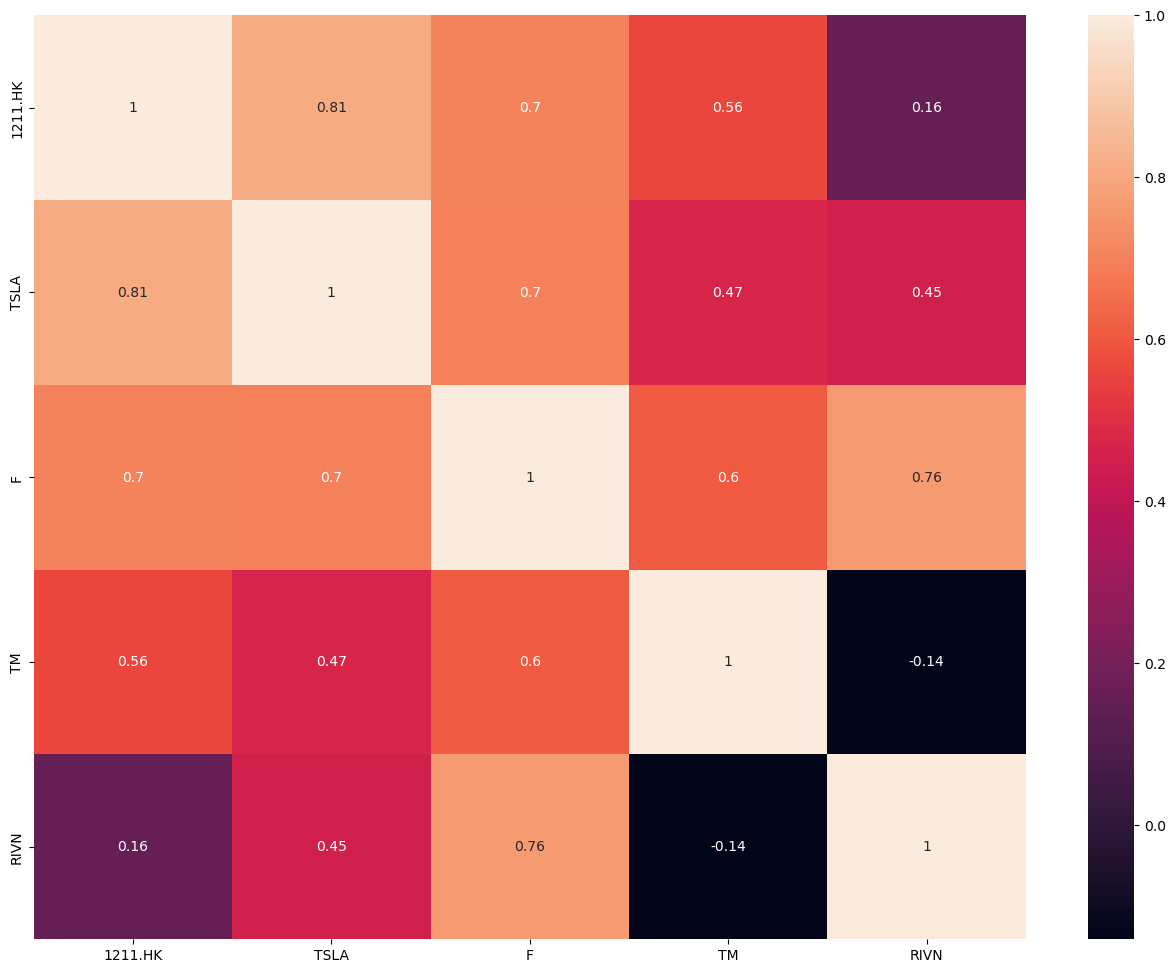

In [6]:
figure(figsize= (16, 12), dpi=100)
sns.heatmap(corr_matrix, annot=True)

### Approaches for Long/Short
1. High correlation: Stock moves up and down together with market
- Find high correlation:
TSLA and F

2. Low correlation with a possibility of mean reverting in short time frame
- Medium Correlation
RIVN

### High Correlation
TSLA and F

<Figure size 800x600 with 0 Axes>

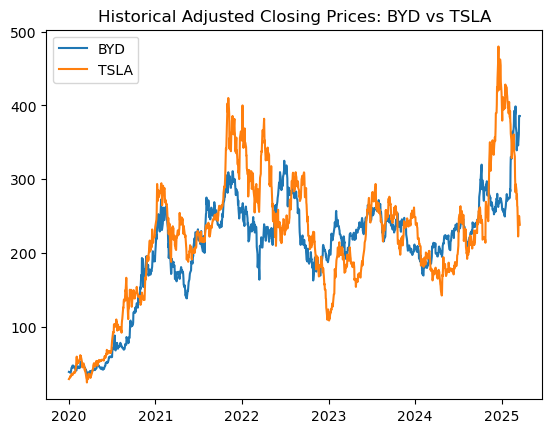

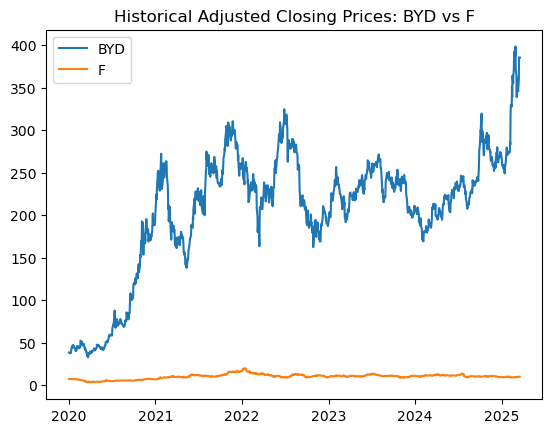

In [ ]:
figure(figsize=(8, 6), dpi=100)

for i in range(2):
    ticker2 = t_ind[i+1]
    # Extract and clean data for both tickers
    data1 = df_ind['1211.HK'].dropna()
    data2 = df_ind[ticker2].dropna()

    # Create a new figure for each pair
    plt.figure()

    # Plot both time series
    plt.plot(data1, label='BYD')
    plt.plot(data2, label=ticker2)

    # Add title and legend
    plt.title(f'Historical Adjusted Closing Prices: BYD vs {ticker2}')
    plt.legend()

    # Show or save the plot (uncomment the appropriate line below)
    plt.show()  # This will display the plot on screen
    # plt.savefig(f'plot_{ticker1}_vs_{ticker2}.png')  # This will save each plot as a file
    plt.close()  # Close the figure to free memory


<Figure size 800x600 with 0 Axes>

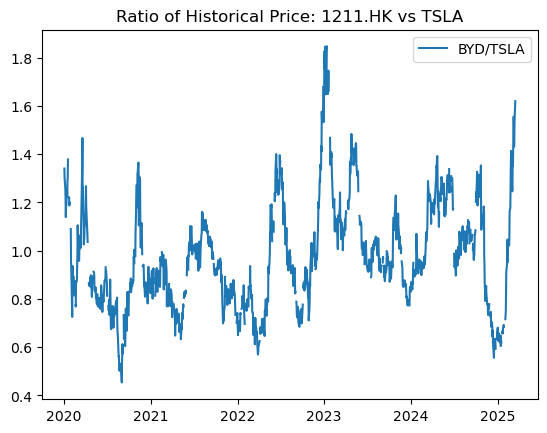

Shape of price1 (endog): (1244,)
Shape of price2 (exog): (1244,)
We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.031860977093846235


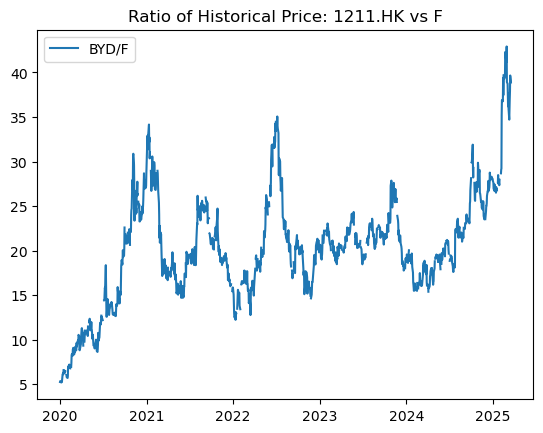

Shape of price1 (endog): (1244,)
Shape of price2 (exog): (1244,)
We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.46932177024411925


In [8]:
figure(figsize=(8, 6), dpi=100)

for i in range(2):
    ticker1 = t_ind[0]
    ticker2 = t_ind[i+1]
    # Extract and clean data for both tickers
    data1 = df_ind[ticker1].dropna()
    data2 = df_ind[ticker2].dropna()

    # Create a new figure for each pair
    plt.figure()

    # Plot both time series
    plt.plot(data1/data2, label=f'BYD/{ticker2}')

    # Add title and legend
    plt.title(f'Ratio of Historical Price: {ticker1} vs {ticker2}')
    plt.legend()

    # Show or save the plot (uncomment the appropriate line below)
    plt.show()  # This will display the plot on screen
    # plt.savefig(f'plot_{ticker1}_vs_{ticker2}.png')  # This will save each plot as a file
    plt.close()  # Close the figure to free memory

    price1 = df_ind[ticker1].dropna()
    price2 = df_ind[ticker2].dropna()

    price1, price2 = price1.align(price2, join='inner')

    print("Shape of price1 (endog):", price1.shape)
    print("Shape of price2 (exog):", price2.shape)

    test = ts.coint(price1, price2)

    cointegration_t_statistic = test[0]
    p_val = test[1]
    critical_values = test[2]
    print('We want the P val < 0.05 (meaning that cointegration exists)')
    print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

### Cointegration result:
- Tesla passes the Engle-Granger two-step cointegration test with a P-value of 0.032
---
### Z-score analysis of BYD vs Tesla

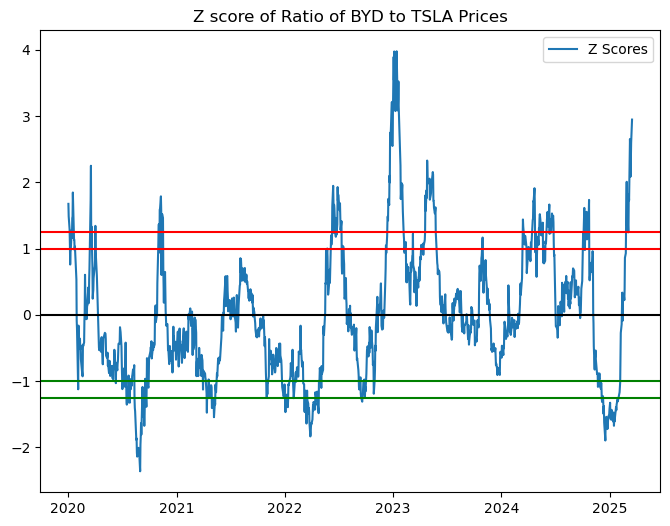

In [9]:
# price ratio
a = df_ind['1211.HK'].dropna()
b = df_ind['TSLA'].dropna()

a, b = a.align(b, join='inner')


figure(figsize=(8,6), dpi=100)
ratio = a/b

# NOTE, here you can either use the spread OR the Price ratio approach. Anyways, let's standardize the ratio so we can have a
# upper and lower bound to help evaluate our trends.. Let's stick with the ratio data.
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of BYD to TSLA Prices')
plt.show()
# For the most part, the range that exists outside of these 'bands' must come converge back to the mean. Thus, you can
# determine when you can go long or short the pair (BRK_B to MSFT).

## Low Corellation Stock
RIVN

<Figure size 800x600 with 0 Axes>

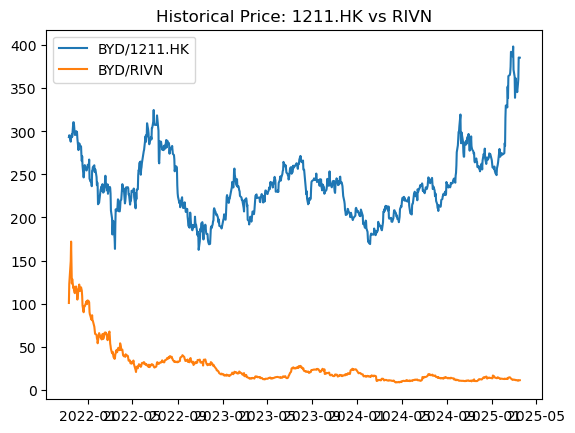

In [10]:
figure(figsize=(8,6),dpi=100)
ticker1 = '1211.HK'
ticker2 = 'RIVN'

data1 = df_ind[ticker1].dropna()
data2 = df_ind[ticker2].dropna()

data1, data2 = data1.align(data2, join='inner')
plt.figure()
plt.plot(data1, label=f'BYD/{ticker1}')
plt.plot(data2, label=f'BYD/{ticker2}')

plt.title(f'Historical Price: {ticker1} vs {ticker2}')
plt.legend()

# Show or save the plot (uncomment the appropriate line below)
plt.show()  # This will display the plot on screen
# plt.savefig(f'plot_{ticker1}_vs_{ticker2}.png')  # This will save each plot as a file
plt.close()  # Close the figure to free memory

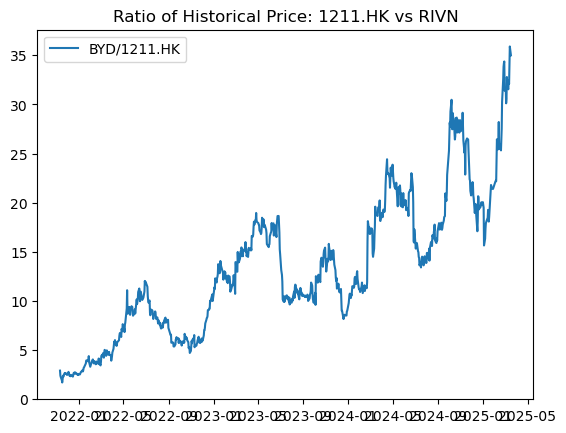

In [11]:
plt.figure()
plt.plot(data1/data2, label=f'BYD/{ticker1}')
plt.title(f'Ratio of Historical Price: {ticker1} vs {ticker2}')
plt.legend()
# Show or save the plot (uncomment the appropriate line below)
plt.show()  # This will display the plot on screen
# plt.savefig(f'plot_{ticker1}_vs_{ticker2}.png')  # This will save each plot as a file
plt.close()  # Close the figure to free memory

# FnB

In [12]:
df_fnb = get_historical_Data(t_fnb)
df_fnb.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,9987.HK,JBFCF,YUM,MCD,SBUX
Date,,,,,
2025-03-11,385.399994,4.60,156.699997,306.760010,99.580002
2025-03-12,380.200012,4.60,154.399994,299.399994,98.690002
2025-03-13,383.799988,3.03,153.419998,297.500000,96.040001
2025-03-14,393.600006,4.25,155.050003,299.829987,98.110001
2025-03-17,404.799988,4.50,157.130005,303.970001,99.080002


In [ ]:
corr_matrix = df_fnb.corr()
print(corr_matrix)

          9987.HK     JBFCF       YUM       MCD      SBUX
9987.HK  1.000000 -0.183977 -0.329257 -0.399545  0.602539
JBFCF   -0.183977  1.000000  0.777219  0.740997  0.587015
YUM     -0.329257  0.777219  1.000000  0.931487  0.585429
MCD     -0.399545  0.740997  0.931487  1.000000  0.476910
SBUX     0.602539  0.587015  0.585429  0.476910  1.000000


<Axes: >

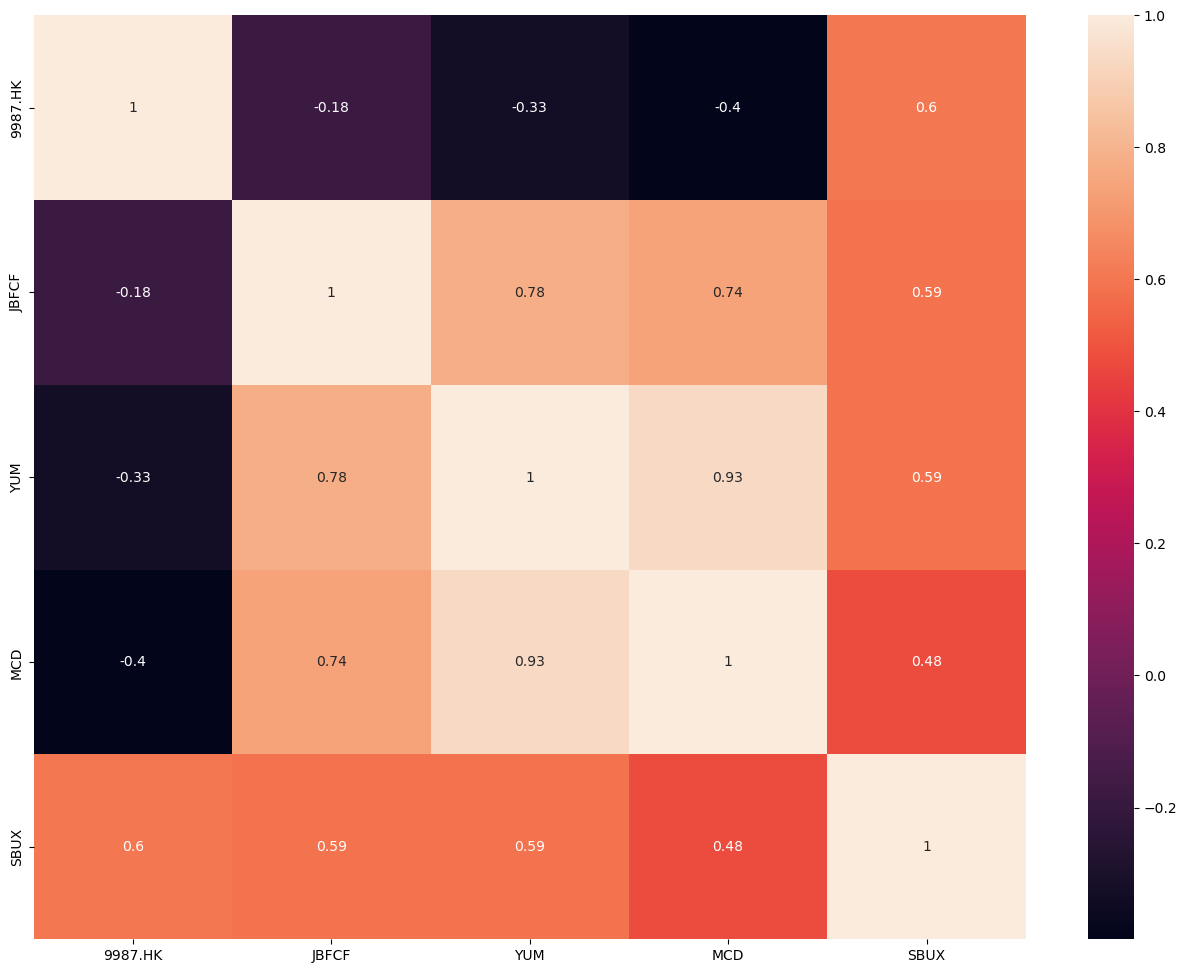

In [15]:
figure(figsize= (16, 12), dpi=100)
sns.heatmap(corr_matrix, annot=True)

### Approaches for Long/Short
1. High correlation: Stock moves up and down together with market
- Find high correlation:
SBUX

2. Low correlation with a possibility of mean reverting in short time frame
- Low Correlation:
YUM, JBFCF, MCD
---
### SBUX

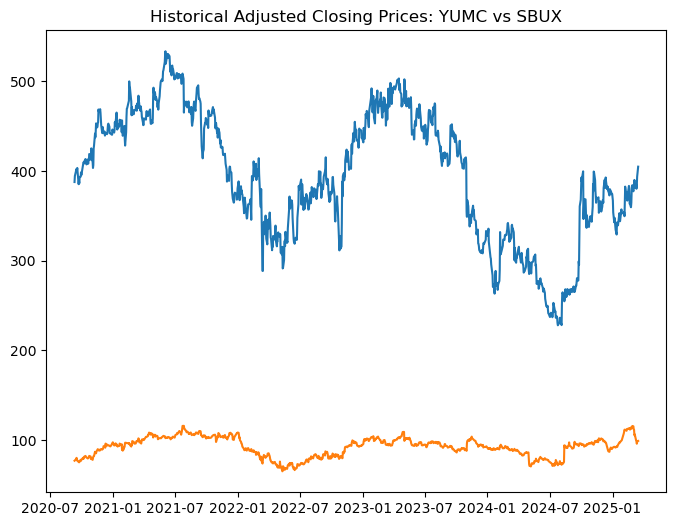

In [17]:
figure(figsize=(8,6), dpi=100)

data1 = df_fnb['9987.HK'].dropna()
data2 = df_fnb['SBUX'].dropna()

data1, data2 = data1.align(data2, join='inner')

plt.figure
plt.plot(data1, label='9987.HK')
plt.plot(data2, label='SBUX')

plt.title('Historical Adjusted Closing Prices: YUMC vs SBUX')
plt.show()
plt.close()

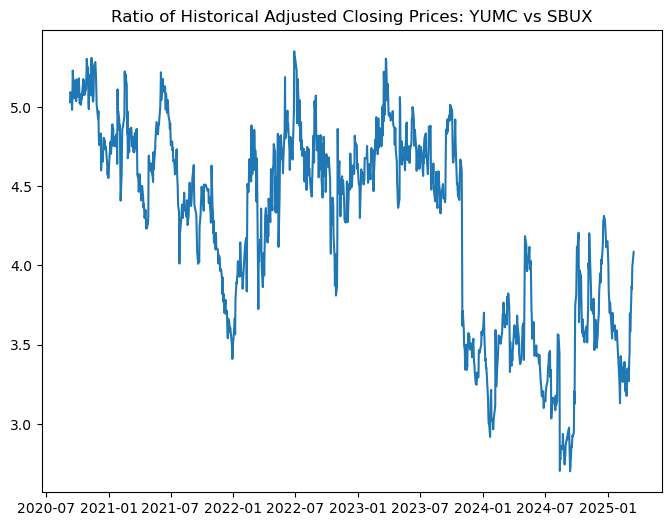

In [18]:
figure(figsize=(8,6), dpi=100)

data1 = df_fnb['9987.HK'].dropna()
data2 = df_fnb['SBUX'].dropna()

data1, data2 = data1.align(data2, join='inner')

plt.figure
plt.plot(data1/data2, label='9987.HK/SBUX')

plt.title('Ratio of Historical Adjusted Closing Prices: YUMC vs SBUX')
plt.show()
plt.close()

### Test for cointegration

In [19]:
test = ts.coint(data1, data2)
cointegration_t_statistic = test[0]
p_val = test[1]
critical_values = test[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)


We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.14370283463821443


---
### YUM, JBFCF, MCD

<Figure size 800x600 with 0 Axes>

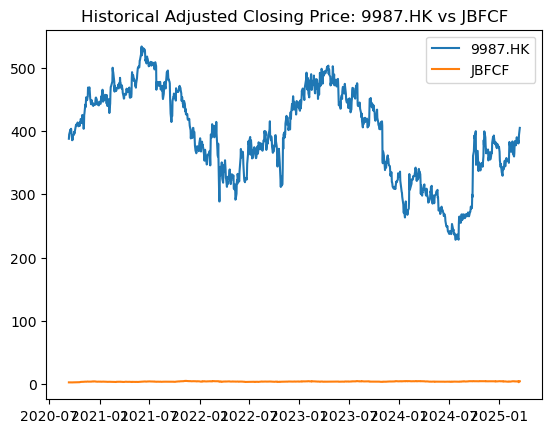

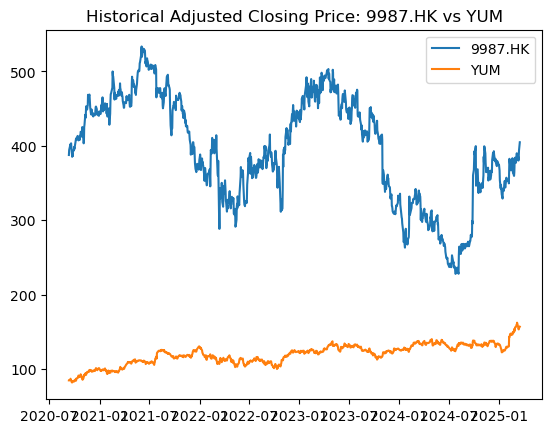

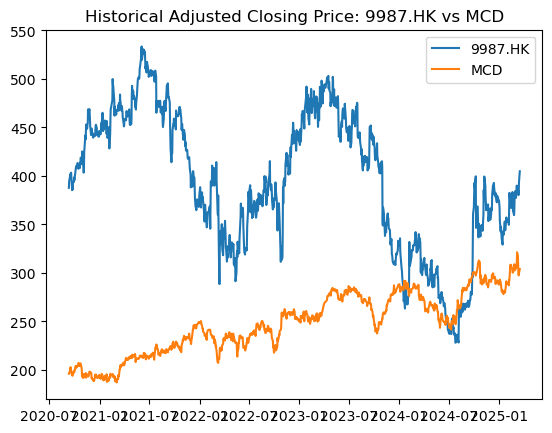

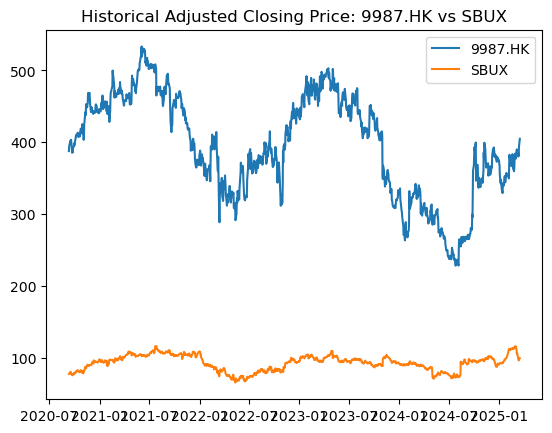

In [21]:
figure(figsize=(8,6), dpi=100)

for i in range(4):
    ticker1 = '9987.HK'
    ticker2 = t_fnb[i+1]

    data1 = df_fnb[ticker1].dropna()
    data2 = df_fnb[ticker2].dropna()

    data1, data2 = data1.align(data2, join='inner')

    plt.figure()
    plt.plot(data1, label=ticker1)
    plt.plot(data2, label=ticker2)

    plt.title(f'Historical Adjusted Closing Price: {ticker1} vs {ticker2}')
    plt.legend()

    plt.show()
    plt.close()


<Figure size 800x600 with 0 Axes>

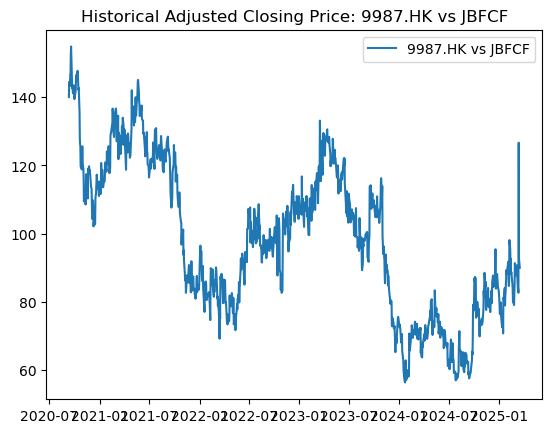

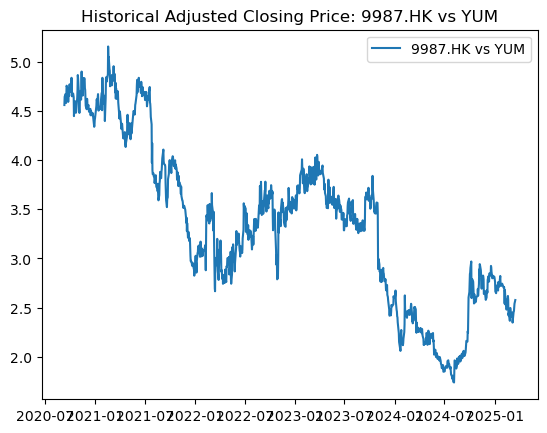

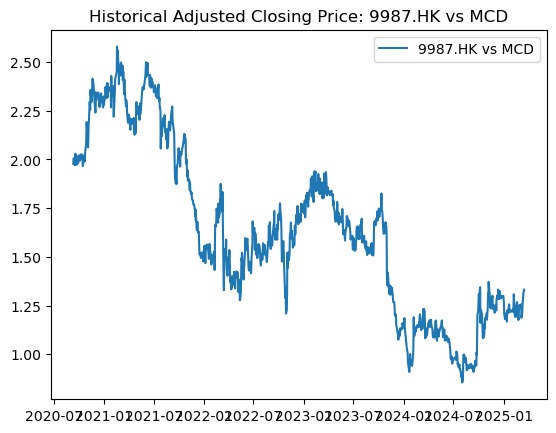

In [23]:
figure(figsize=(8,6), dpi=100)

for i in range(3):
    ticker1 = '9987.HK'
    ticker2 = t_fnb[i+1]

    data1 = df_fnb[ticker1].dropna()
    data2 = df_fnb[ticker2].dropna()

    data1, data2 = data1.align(data2, join='inner')

    plt.figure()
    plt.plot(data1/data2, label=f'{ticker1} vs {ticker2}')

    plt.title(f'Historical Adjusted Closing Price: {ticker1} vs {ticker2}')
    plt.legend()

    plt.show()
    plt.close()

### Test for Cointegration

In [24]:
figure(figsize=(8,6), dpi=100)

for i in range(3):
    ticker1 = '9987.HK'
    ticker2 = t_fnb[i+1]

    data1 = df_fnb[ticker1].dropna()
    data2 = df_fnb[ticker2].dropna()

    data1, data2 = data1.align(data2, join='inner')

    test = ts.coint(data1, data2)
    cointegration_t_statistic = test[0]
    p_val = test[1]
    critical_values = test[2]
    print('We want the P val < 0.05 (meaning that cointegration exists)')
    print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.5248268288885184
We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.34930379737595
We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.37672252666814715


<Figure size 800x600 with 0 Axes>

---
## Sportswear

In [25]:
df_spw = get_historical_Data(t_spw)
df_spw.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,2020.HK,NKE,LULU,2331.HK
Date,,,,
2025-03-11,97.800003,74.169998,319.420013,18.219999
2025-03-12,98.150002,73.580002,316.489990,17.740000
2025-03-13,94.849998,72.639999,309.679993,17.240000
2025-03-14,99.900002,71.660004,311.029999,18.340000
2025-03-17,99.150002,73.699997,327.089996,18.980000


In [26]:
corr_matrix = df_spw.corr()
print(corr_matrix)

          2020.HK       NKE      LULU   2331.HK
2020.HK  1.000000  0.784874  0.289595  0.759331
NKE      0.784874  1.000000  0.410688  0.833869
LULU     0.289595  0.410688  1.000000  0.191895
2331.HK  0.759331  0.833869  0.191895  1.000000


<Axes: >

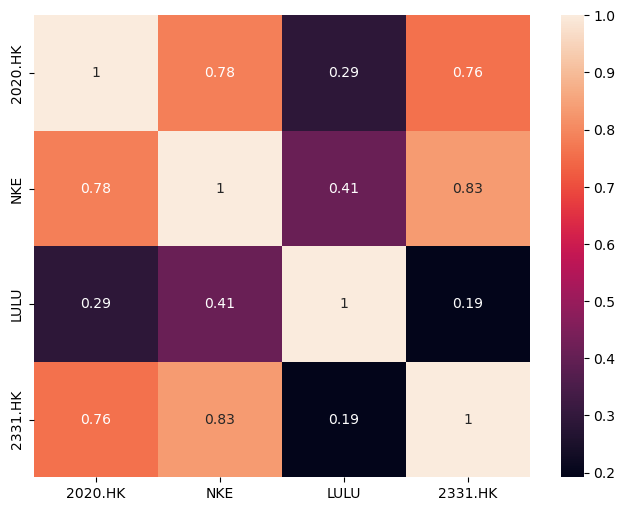

In [28]:
figure(figsize=(8,6),dpi=100)
sns.heatmap(corr_matrix, annot=True)


### Approaches for Long/Short
1. High correlation: Stock moves up and down together with market
- Find high correlation:
NKE and Li Ning

2. Low correlation with a possibility of mean reverting in short time frame
- Medium Correlation
LULU

### NKE, 2331.HK

<Figure size 800x600 with 0 Axes>

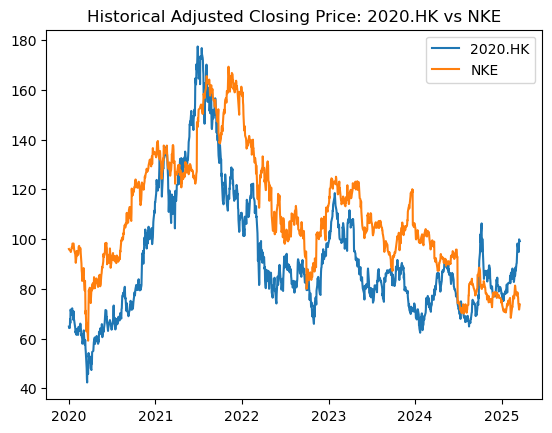

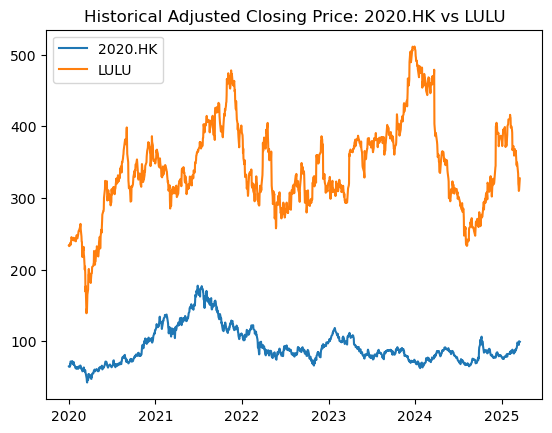

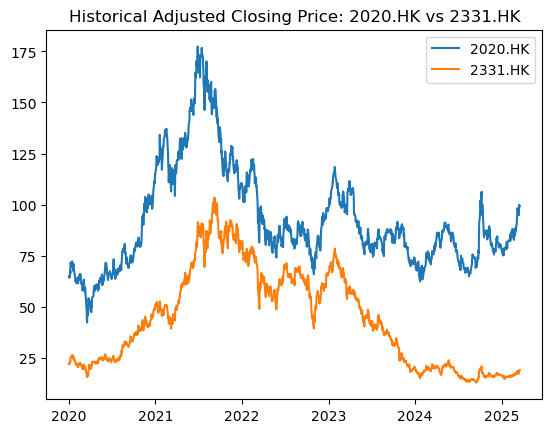

In [29]:
figure(figsize=(8, 6), dpi=100)

for i in range(len(t_spw)-1):
    ticker1 = t_spw[0]
    ticker2 = t_spw[i+1]

    data1 = df_spw[ticker1].dropna()
    data2 = df_spw[ticker2].dropna()

    data1, data2=data1.align(data2, join='inner')

    plt.figure()
    plt.plot(data1, label=ticker1)
    plt.plot(data2, label=ticker2)

    plt.title(f'Historical Adjusted Closing Price: {ticker1} vs {ticker2}')
    plt.legend()

    plt.show()
    plt.close()


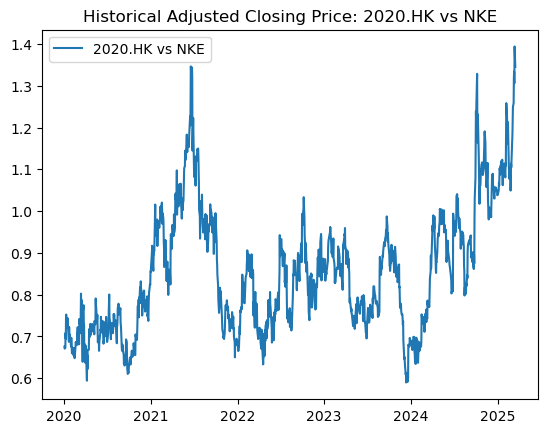

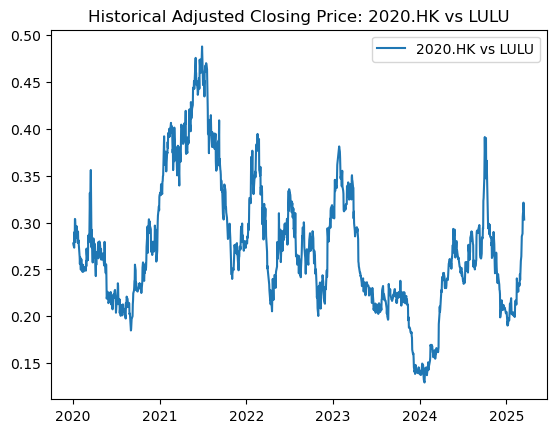

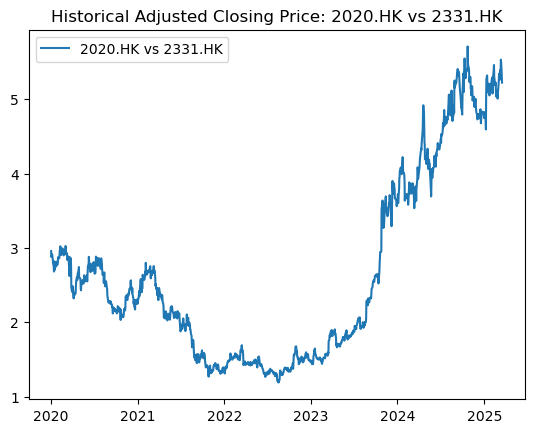

In [31]:
for i in range(len(t_spw)-1):
    ticker1 = t_spw[0]
    ticker2 = t_spw[i+1]

    data1 = df_spw[ticker1].dropna()
    data2 = df_spw[ticker2].dropna()

    data1, data2=data1.align(data2, join='inner')

    plt.figure()
    plt.plot(data1/data2, label=f'{ticker1} vs {ticker2}')

    plt.title(f'Historical Adjusted Closing Price: {ticker1} vs {ticker2}')
    plt.legend()

    plt.show()
    plt.close()

### Test for Cointegration

In [33]:
figure(figsize=(8,6), dpi=100)

for i in range(3):
    ticker1 = '9987.HK'
    ticker2 = t_fnb[i+1]

    data1 = df_fnb[ticker1].dropna()
    data2 = df_fnb[ticker2].dropna()

    data1, data2 = data1.align(data2, join='inner')

    test = ts.coint(data1, data2)
    cointegration_t_statistic = test[0]
    p_val = test[1]
    critical_values = test[2]
    print('We want the P val < 0.05 (meaning that cointegration exists)')
    print(f'P value for the augmented Engle-Granger two-step cointegration test of {ticker1} and {ticker2} is', p_val)

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test of 9987.HK and JBFCF is 0.5248268288885184
We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test of 9987.HK and YUM is 0.34930379737595
We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test of 9987.HK and MCD is 0.37672252666814715


<Figure size 800x600 with 0 Axes>

## Beer

In [34]:
df_beer = get_historical_Data(t_ber)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [35]:
corr_matrix = df_beer.corr()
print(corr_matrix)

          1876.HK        PM       STZ
1876.HK  1.000000 -0.758762 -0.395260
PM      -0.758762  1.000000  0.461192
STZ     -0.395260  0.461192  1.000000


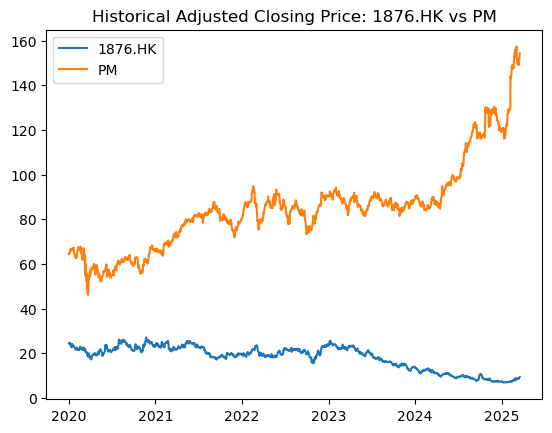

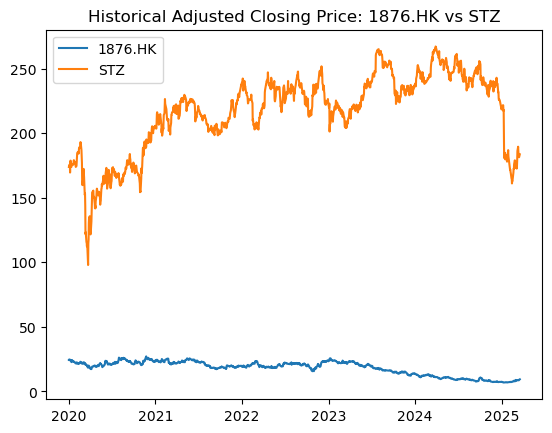

In [37]:
for i in range(len(t_ber)-1):
    ticker1 = t_ber[0]
    ticker2 = t_ber[i+1]

    data1 = df_beer[ticker1].dropna()
    data2 = df_beer[ticker2].dropna()

    data1, data2=data1.align(data2, join='inner')

    plt.figure()
    plt.plot(data1, label=ticker1)
    plt.plot(data2, label=ticker2)

    plt.title(f'Historical Adjusted Closing Price: {ticker1} vs {ticker2}')
    plt.legend()

    plt.show()
    plt.close()

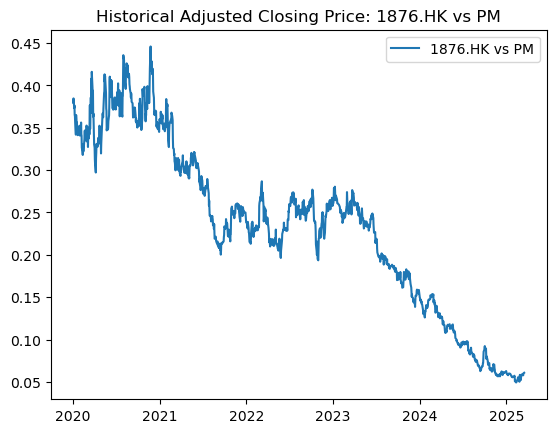

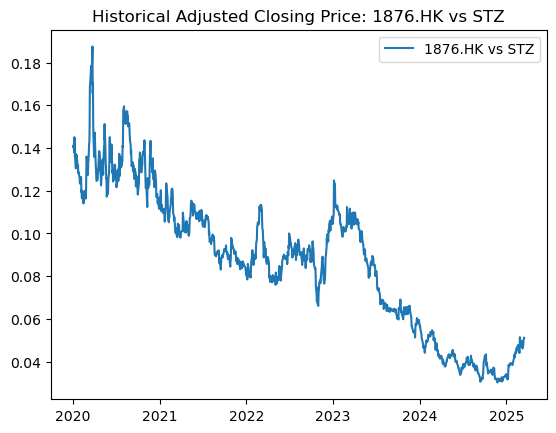

In [38]:
for i in range(len(t_ber)-1):
    ticker1 = t_ber[0]
    ticker2 = t_ber[i+1]

    data1 = df_beer[ticker1].dropna()
    data2 = df_beer[ticker2].dropna()

    data1, data2=data1.align(data2, join='inner')

    plt.figure()
    plt.plot(data1/data2, label=f'{ticker1} vs {ticker2}')

    plt.title(f'Historical Adjusted Closing Price: {ticker1} vs {ticker2}')
    plt.legend()

    plt.show()
    plt.close()

I don't really like the results

---
## Semiconductor


In [39]:
df_smc = get_historical_Data(t_smc)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Axes: >

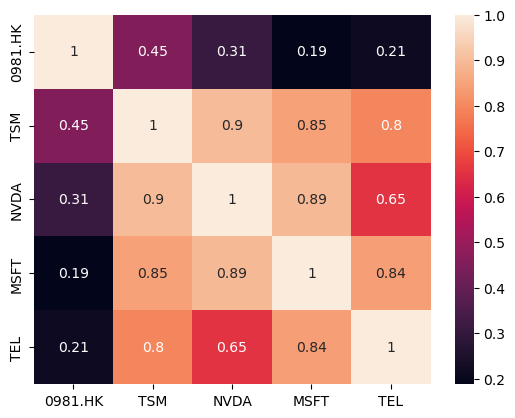

In [40]:
corr_matrix = df_smc.corr()
sns.heatmap(corr_matrix, annot=True)

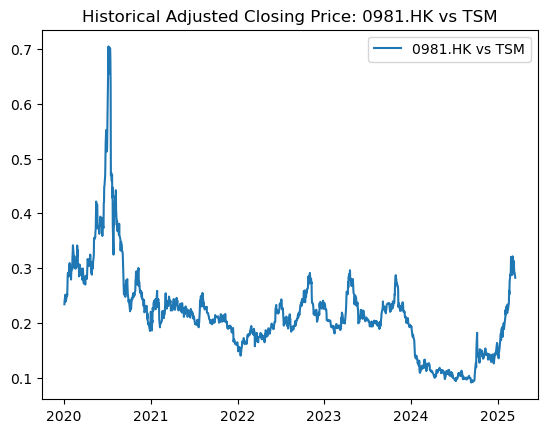

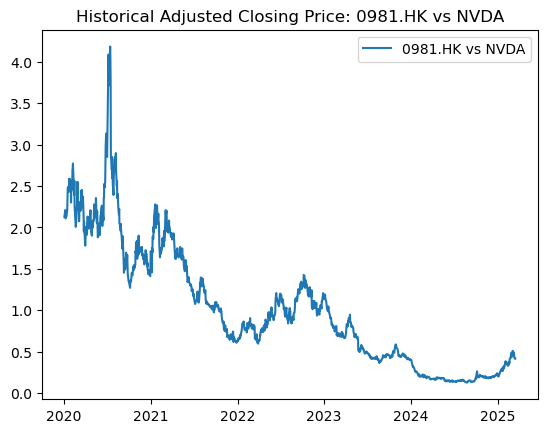

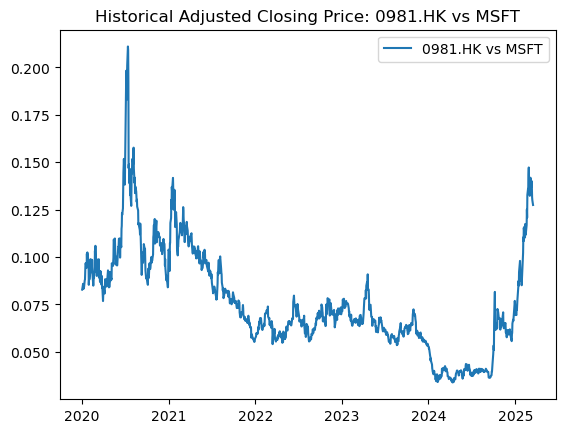

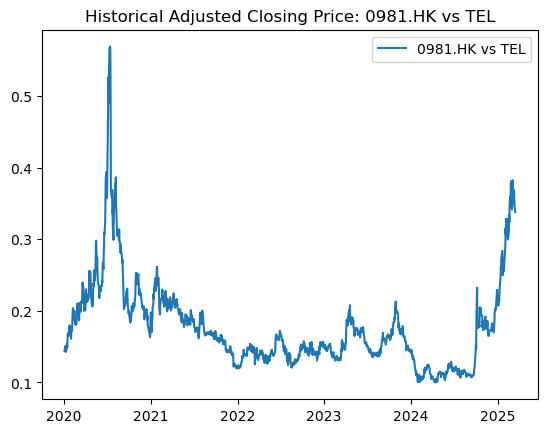

In [41]:
for i in range(len(t_smc)-1):
    ticker1 = t_smc[0]
    ticker2 = t_smc[i+1]

    data1 = df_smc[ticker1].dropna()
    data2 = df_smc[ticker2].dropna()

    data1, data2=data1.align(data2, join='inner')

    plt.figure()
    plt.plot(data1/data2, label=f'{ticker1} vs {ticker2}')

    plt.title(f'Historical Adjusted Closing Price: {ticker1} vs {ticker2}')
    plt.legend()

    plt.show()
    plt.close()

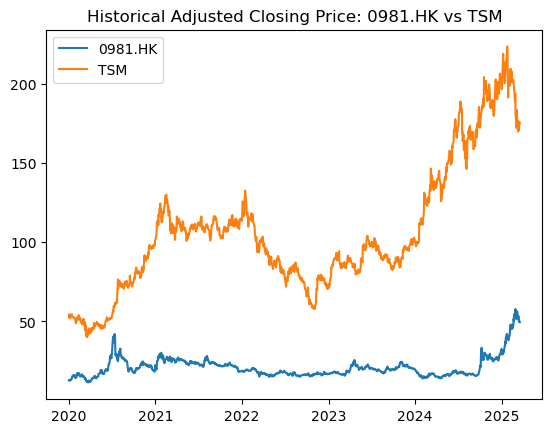

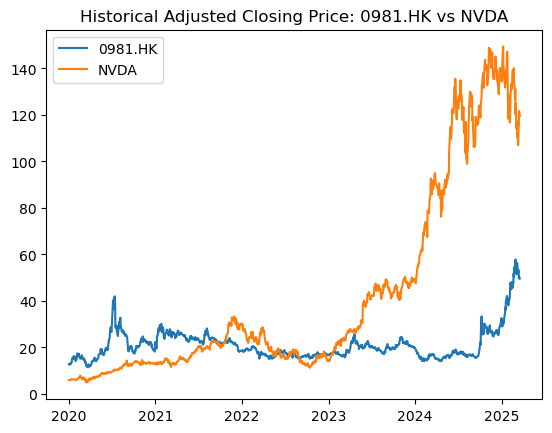

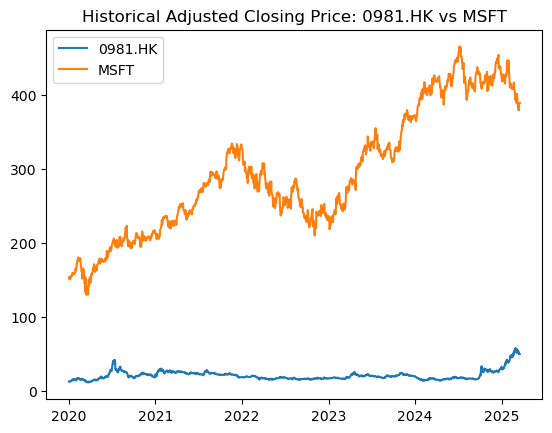

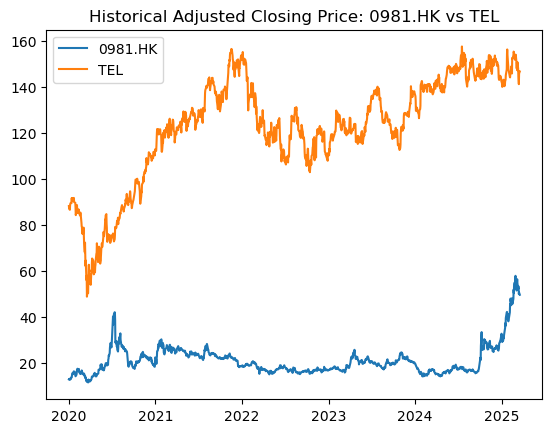

In [42]:
for i in range(len(t_smc)-1):
    ticker1 = t_smc[0]
    ticker2 = t_smc[i+1]

    data1 = df_smc[ticker1].dropna()
    data2 = df_smc[ticker2].dropna()

    data1, data2=data1.align(data2, join='inner')

    plt.figure()
    plt.plot(data1, label=ticker1)
    plt.plot(data2, label=ticker2)

    plt.title(f'Historical Adjusted Closing Price: {ticker1} vs {ticker2}')
    plt.legend()

    plt.show()
    plt.close()

# Honestly I am very confused, fuck